In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
np.random.seed(10)

In [3]:
initial_amount = 1000
gain_pct = 0.5
loss_pct = 0.4
leverage = 0.25

# num of time steps
t_N = 60

# num of people
p_N = 1000000

In [4]:
evt_data = {}
gain_data = {}

# generate data for every person
for i in range(p_N):
    # start with initial amount as leverage
    person_gain = initial_amount
    
    # generate random events of gain / loss for N time steps
    evts = np.random.randint(0,2, t_N)
    
    # temp state store for interim gains
    gains = []
    
    # calc gain progression
    for e in evts:
        if e == 0:
            person_gain = (person_gain * (1 - leverage)) + (person_gain * leverage * (1 - loss_pct))
        else:
            person_gain = (person_gain * (1 - leverage)) + (person_gain * leverage * (1 + gain_pct))
        
        gains.append(person_gain)

#         print(person_gain, e)
        
    # append gain data - events, gain progression, to a dictionary
    evt_data[f"p_evt_{i+1}"] = evts
    gain_data[f"p_gain_{i+1}"] = gains

In [5]:
# df_evt = pd.DataFrame(evt_data)
df_gain = pd.DataFrame(gain_data)

In [ ]:
df_gain

In [8]:
df_gain.iloc[-1].agg(["mean", "median", "min", "max"])

mean       2105.936679
median     1451.613360
min          16.735963
max       80580.728757
Name: 59, dtype: float64

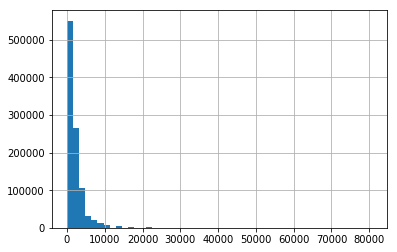

In [9]:
df_gain.iloc[-1].hist(bins=50)

In [10]:
df_ens = pd.DataFrame()
df_ens["ens_avg"] = df_gain.apply(np.mean, axis=1)
df_ens["ens_med"] = df_gain.apply(np.median, axis=1)

In [ ]:
df_ens

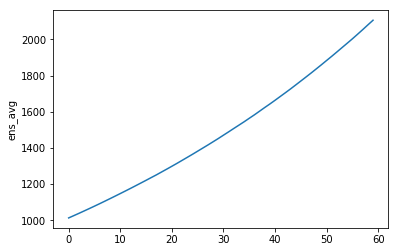

In [12]:
sns.lineplot(x=df_ens.index, y=df_ens["ens_avg"], )

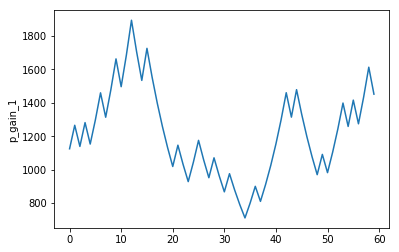

In [13]:
sns.lineplot(x=df_gain.index, y=df_gain["p_gain_1"])

## Ensemble Average for leverage = 1.0

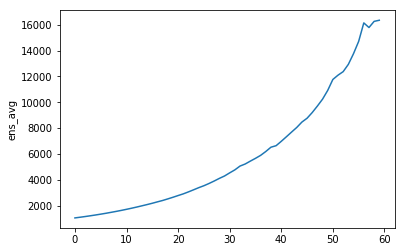

In [11]:
sns.lineplot(x=df_ens.index, y=df_ens["ens_avg"], )

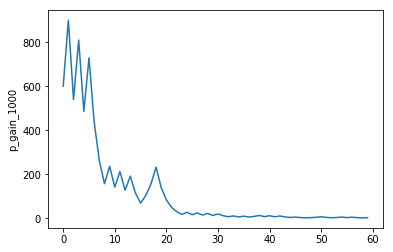

In [13]:
sns.lineplot(x=df_gain.index, y=df_gain["p_gain_1000"])